# Exploring Single Qubit Gates 

In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' 

## Pauli Gates

### Pauli X-Gate

Pauli X-Gate flips the bit.\
\
$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0|$

$X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$

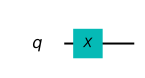

In [2]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')


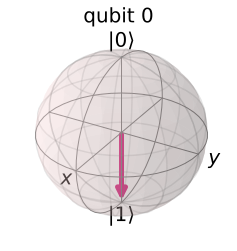

In [3]:
simulator_s = Aer.get_backend('statevector_simulator')
out = execute(qc,simulator_s).result().get_statevector()
plot_bloch_multivector(out)

### Pauli Y and Z gates

They perform roations by $\pi$ around Y and Z-axis of Bloch Sphere.
$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

$Y=i|0⟩⟨1|−i|1⟩⟨0|$\
$Z=|0⟩⟨0|−|1⟩⟨1|$

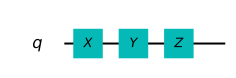

In [4]:
#Adding X, Y and Z to a circuit
qc1 = QuantumCircuit(1)
qc1.x(0)
qc1.y(0) # Do Y-gate on qubit 0
qc1.z(0) # Do Z-gate on qubit 0
qc1.draw(output='mpl')

Order of operation is very important. GO from left to right only!

Unitary Matrix: Z $\otimes$ Y $\otimes$ X =


$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} -i & 0 \\ 0 & -i \end{bmatrix}=i\begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} $

In [5]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc1,simulator_u).result()
unitary=result.get_unitary(qc1)
print ('unitary:\n',unitary)
result3=execute(qc1,simulator_s).result()
outputstate = result3.get_statevector(qc1, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j]]
outputstate:
 [0.-1.j 0.+0.j]


## R_phi gate

This get has parameter $\phi$ (real Number). We can specify how much $\phi$ will be.\
$R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}$\
Z-gate is special case of $R_\phi$ gate with $\phi$=$\pi$

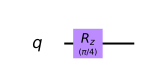

In [6]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw(output='mpl')

In [7]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
outputstate:
 [1.+0.j 0.+0.j]


## The I,S and T- gates

I-gate is an identity gate.\
$I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$


S-gate is also called $\sqrt{Z}$ gate, i.e., $\phi=\pi/2$.\
For S-gate $\phi=\pi/2$.\
Unlike other gates introduced so far, S-gate is not it's own inverse.\
So you will see $S^\dagger$ gate.\
$S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$\
Mathematically, two S gates applied successively = Z-gate.\
T-gate is $R_\phi$ with $\phi=\pi/4$\
$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$


### S-gate

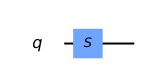

In [8]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.draw(output='mpl')

In [9]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
outputstate:
 [1.+0.j 0.+0.j]


### Applying S and S_dagger successsively

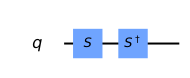

In [10]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw(output='mpl')

In [11]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
outputstate:
 [1.+0.j 0.+0.j]


### The General U3(θ,ϕ,λ) gate

$U_3$ gate the most general of all single-qubit quantum gates.

$U_3 = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix} $
     
Qiskit also provides U2 and U1-gates, which are specific cases of the U3 gate in which  θ=0 , and  θ=ϕ=0  respectively. You will notice that the U1-gate is equivalent to the Rϕ-gate.\

Every gate we saw above is pretty much a subset of this gate.

### U1-Gate

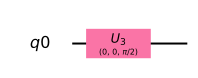

In [12]:
q = QuantumRegister(1) # Need to specify this for U3 to work
qc = QuantumCircuit(q)
qc.u3(0,0,pi/2,q) # U1 gate
qc.draw(output='mpl')

In [13]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
outputstate:
 [1.+0.j 0.+0.j]


### U2 gate

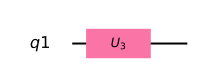

In [14]:
q = QuantumRegister(1) # Need to specify this for U3 to work
qc = QuantumCircuit(q)
qc.u3(0,pi/2,pi/2,q) #U2 gate
qc.draw(output='mpl')

In [15]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
outputstate:
 [1.+0.j 0.+0.j]


### U3 gate

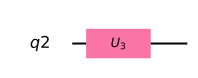

In [16]:
q = QuantumRegister(1) # Need to specify this for U3 to work
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q) #U3 gate
qc.draw(output='mpl')

In [17]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[ 0.70710678+0.j          0.        -0.70710678j]
 [ 0.        +0.70710678j -0.70710678+0.j        ]]
outputstate:
 [0.707+0.j    0.   +0.707j]


### A mixture of U3, U2 and U1 gates

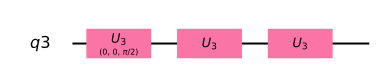

In [18]:
q = QuantumRegister(1) # Need to specify this for U3 to work
qc = QuantumCircuit(q)
qc.u3(0,0,pi/2,q) # U1 gate
qc.u3(0,pi/2,pi/2,q) #U2 gate
qc.u3(pi/2,pi/2,pi/2,q) #U3 gate
qc.draw(output='mpl')

In [19]:
#unitary vector part
simulator_u = Aer.get_backend('unitary_simulator')
result=execute(qc,simulator_u).result()
unitary=result.get_unitary(qc)
print ('unitary:\n',unitary)
result3=execute(qc,simulator_s).result()
outputstate = result3.get_statevector(qc, decimals=3)
print ('outputstate:\n',outputstate)

unitary:
 [[ 0.70710678+0.j         -0.70710678+0.j        ]
 [ 0.        +0.70710678j  0.        +0.70710678j]]
outputstate:
 [0.707+0.j    0.   +0.707j]
